In [33]:
import io
import numpy as np

In [34]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [45]:
src_path = 'uk-en n5/vectors-uk.txt'
tgt_path = 'uk-en n5/vectors-en.txt'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

In [44]:
src_word2id

{',': 0,
 '.': 1,
 'the': 2,
 '</s>': 3,
 'of': 4,
 '-': 5,
 'in': 6,
 'and': 7,
 "'": 8,
 ')': 9,
 '(': 10,
 'to': 11,
 'a': 12,
 'is': 13,
 'was': 14,
 'on': 15,
 's': 16,
 'for': 17,
 'as': 18,
 'by': 19,
 'that': 20,
 'it': 21,
 'with': 22,
 'from': 23,
 'at': 24,
 'he': 25,
 'this': 26,
 'be': 27,
 'i': 28,
 'an': 29,
 'utc': 30,
 'his': 31,
 'not': 32,
 '–': 33,
 'are': 34,
 'or': 35,
 'talk': 36,
 'which': 37,
 'also': 38,
 'has': 39,
 'were': 40,
 'but': 41,
 'have': 42,
 '#': 43,
 'one': 44,
 'rd': 45,
 'new': 46,
 'first': 47,
 'page': 48,
 'no': 49,
 'you': 50,
 'they': 51,
 'had': 52,
 'article': 53,
 't': 54,
 'who': 55,
 '?': 56,
 'all': 57,
 'their': 58,
 'there': 59,
 'been': 60,
 'made': 61,
 'its': 62,
 'people': 63,
 'may': 64,
 'after': 65,
 '%': 66,
 'other': 67,
 'should': 68,
 'two': 69,
 'score': 70,
 'her': 71,
 'can': 72,
 'would': 73,
 'more': 74,
 'if': 75,
 'she': 76,
 'about': 77,
 'when': 78,
 'time': 79,
 'team': 80,
 'american': 81,
 'such': 82,
 'th': 

In [40]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [29]:
tgt_word2id

{'</s>': 0,
 ',': 1,
 '.': 2,
 'в': 3,
 '-': 4,
 ')': 5,
 '(': 6,
 'и': 7,
 'на': 8,
 "'": 9,
 'с': 10,
 '—': 11,
 'по': 12,
 'категория': 13,
 'не': 14,
 '\xa0—': 15,
 'года': 16,
 'utc': 17,
 'из': 18,
 'а': 19,
 'что': 20,
 'к': 21,
 'году': 22,
 'для': 23,
 'как': 24,
 'от': 25,
 '#': 26,
 'за': 27,
 'был': 28,
 'о': 29,
 'его': 30,
 'он': 31,
 'до': 32,
 'также': 33,
 'это': 34,
 'но': 35,
 'то': 36,
 'rd': 37,
 '?': 38,
 'при': 39,
 'или': 40,
 'я': 41,
 'после': 42,
 'области': 43,
 'у': 44,
 'во': 45,
 'год': 46,
 'было': 47,
 'время': 48,
 '/': 49,
 'состав': 50,
 'была': 51,
 'же': 52,
 'так': 53,
 'место': 54,
 'были': 55,
 'м': 56,
 'район': 57,
 'вид': 58,
 '#перенаправление': 59,
 'the': 60,
 'района': 61,
 'score': 62,
 'под': 63,
 'их': 64,
 '%': 65,
 'россии': 66,
 'если': 67,
 'только': 68,
 'есть': 69,
 'её': 70,
 'й': 71,
 'язык': 72,
 'ссср': 73,
 'районе': 74,
 'код': 75,
 'более': 76,
 '»': 77,
 'мая': 78,
 'дата': 79,
 'г': 80,
 'ноября': 81,
 'деревня': 82,
 'г

In [6]:
src_word = 'mother'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "mother":
1.0000 - mother
0.8921 - grandmother
0.8150 - father
0.8130 - stepmother
0.8123 - aunt


In [7]:
src_word = 'love'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "mother":
0.4947 - spouse
0.4944 - アーデルハイト
0.4914 - エリーザベト
0.4914 - 歳で亡くなった
0.4913 - 祖父母


In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.06


In [43]:
"університет" in src_word2id

False

In [14]:
"大学" in tgt_word2id

True

In [47]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

In [18]:
plt.rcParams['font.sans-serif']=['SimHei']

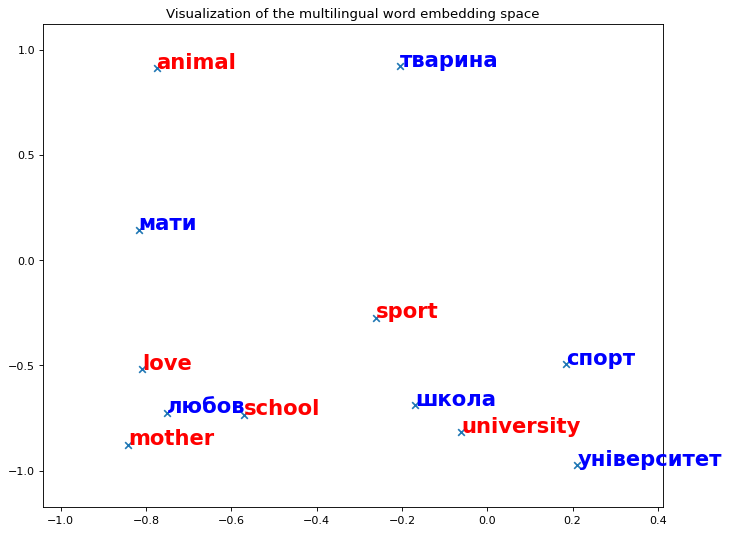

In [48]:
# get 6 random input words
tgt_words = ['university','animal','sport','school','love','mother']
src_words = ['університет','тварина','спорт','школа','любов','мати']

# assert words in dictionaries
# for sw in src_words:
#     assert sw in src_word2id, '"%s" not in source dictionary' % sw
# for tw in tgt_words:
#     assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)